In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train=pd.read_csv("titanic_train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


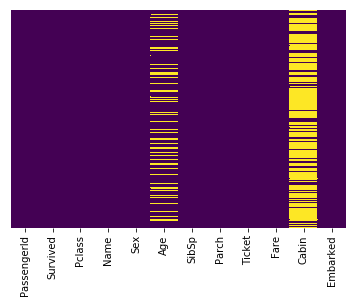

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
                              

In [19]:
sns.set_style("whitegrid")


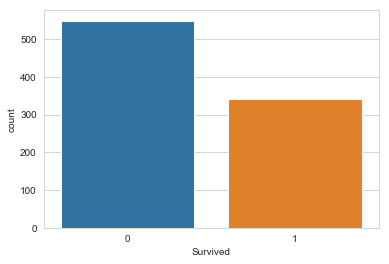

In [22]:
#who survived who didn't survived
sns.countplot(x="Survived",data=train)

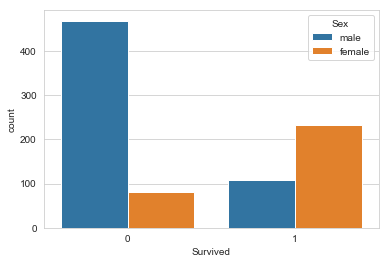

In [23]:
sns.countplot(x="Survived",hue="Sex",data=train)

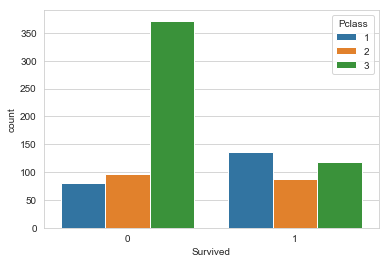

In [24]:
sns.countplot(x="Survived",hue="Pclass",data=train)

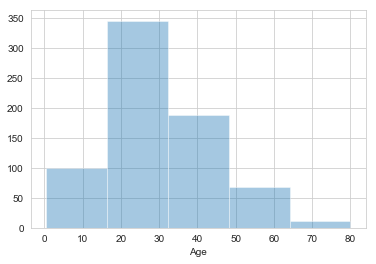

In [30]:
sns.distplot(train["Age"].dropna(),kde=False,bins=5)


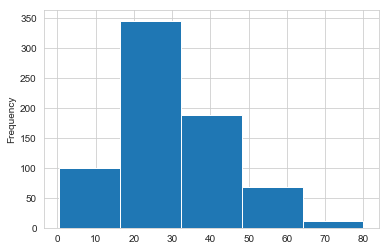

In [33]:
train["Age"].plot.hist(bins=5)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


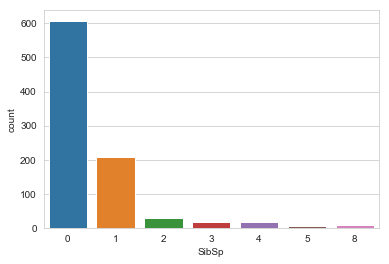

In [37]:
sns.countplot(x="SibSp",data=train)

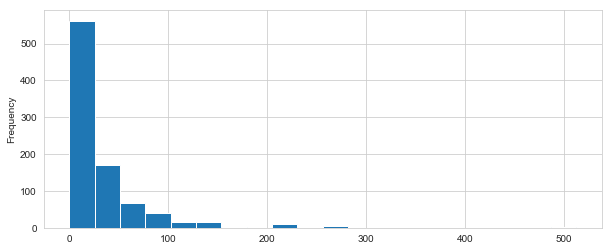

In [41]:
train["Fare"].plot.hist(bins=20,figsize=(10,4))

In [43]:
#with cuffling
import cufflinks as cf

In [45]:
cf.go_offline()

In [50]:
train["Fare"].iplot(kind="hist")

In [52]:
#cleaning the data
#FILLING OF MISSING DATA
# IMPUTATION IS FILLING THE MISSING AGE BY AVERAGE OF THE PASSENGER


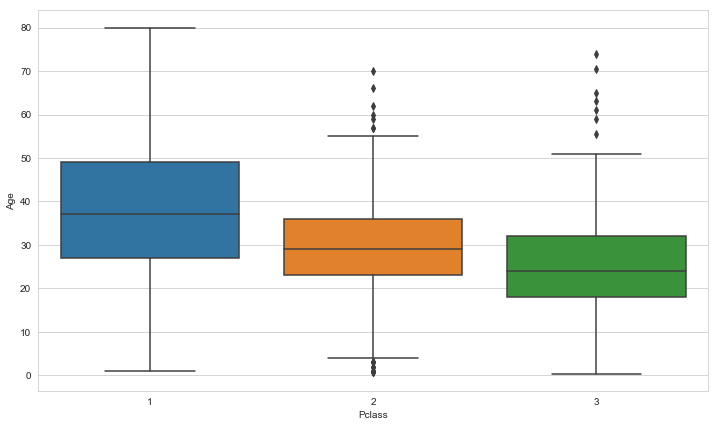

In [55]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass",y="Age",data=train)


In [56]:
#function to fill empty value of age in the data set
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [57]:
#applying the functions
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [58]:
#checking heat map again to check the age factor

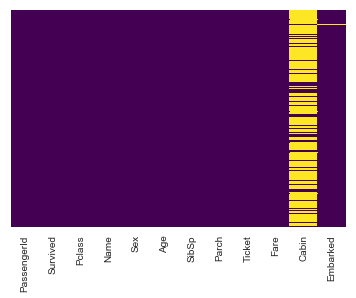

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
                              

In [61]:
#dropping the cabin column due to too many missing data set
train.drop("Cabin",axis=1,inplace=True)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


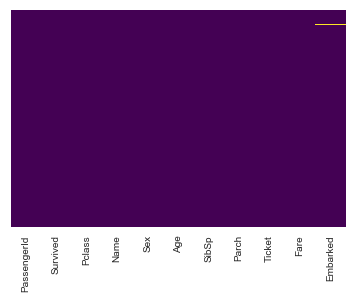

In [63]:
#checking heat map again for missing value
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
                              

In [64]:
train.dropna(inplace=True)

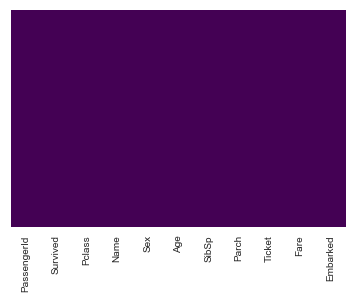

In [65]:
#checking heatmap again for missing value 
#we will not find any missing value
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
                              

In [69]:
#convert categorical features into dummy/indicator variable using pandas
sex=pd.get_dummies(train["Sex"],drop_first=True)


In [71]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [77]:
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [78]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [79]:
#puttig these new column in the original data test
train=pd.concat([train,sex,embark],axis=1)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [81]:
#droping columns that is of no use 
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [84]:
train.drop(["PassengerId"],axis=1,inplace=True)
#droped passenger id as it is working same  as index

In [85]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [88]:
x=train.drop("Survived",axis=1)
y=train["Survived"]

In [89]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)


In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lm=LogisticRegression()

In [95]:
lm.fit(X_train,y_train)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
pd=lm.predict(X_test)

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(y_test,pd))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.75      0.69      0.72       100

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
print(confusion_matrix(y_test,pd))

[[144  23]
 [ 31  69]]
